In [1]:
#import dependencies 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from scipy import stats

In [2]:
# import and read data from .csv create original dataframe
sleep_df = pd.read_csv("resources/Marqueze et al.csv")

In [3]:
#print dataframe 
sleep_df

,id,Gender,Age,Satlazer,Countrycat,Workhourtotal1cat,Enoughsleepcat,Educationlevel,Satworkhour2,SleepQualitycat,...,Work5cat,Depression,Country_Occup_Work5,Sunworkmonth_H,Sunfreemonth_H,SUNWORKFREEMONTH_HOUR,Occup_Work5,Work3cat2,SUNWORKMONTH_HOUR_Mean_INV,SUNWORKMONTH_HOUR_Median_INV
0,1,1,33.0,1,0,0.0,0.0,2.0,1,0.0,...,1,0.0,3,140.0,24.0,106.86,3,1,0,0
1,2,1,64.0,0,0,1.0,0.0,1.0,0,0.0,...,1,0.0,3,160.0,8.0,116.57,3,1,0,0
2,3,1,39.0,0,0,1.0,1.0,2.0,1,0.0,...,1,1.0,3,160.0,NaN,NaN,3,1,0,0
3,4,1,36.0,0,0,1.0,0.0,2.0,2,0.0,...,1,1.0,3,120.0,16.0,90.29,3,1,0,1
4,5,1,22.0,0,0,1.0,0.0,2.0,0,0.0,...,1,0.0,3,100.0,8.0,73.71,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,580289,1,43.0,0,1,0.0,0.0,2.0,0,0.0,...,3,0.0,1,32.0,24.0,28.57,1,0,0,0
1757,580343,0,27.0,0,1,0.0,0.0,0.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1
1758,580345,1,43.0,1,1,0.0,0.0,3.0,1,0.0,...,4,0.0,2,32.0,24.0,28.57,2,1,0,0
1759,580350,1,40.0,0,1,0.0,0.0,3.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1


In [4]:
#show column titles 
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV'],
      dtype='object')

In [5]:
#drop null values from dataframe 
sleep_df.dropna(inplace=True)

In [6]:
sleep_df.count()

id                              1534
Gender                          1534
Age                             1534
Satlazer                        1534
Countrycat                      1534
Workhourtotal1cat               1534
Enoughsleepcat                  1534
Educationlevel                  1534
Satworkhour2                    1534
SleepQualitycat                 1534
AwakeningProblemscat            1534
Sleepinesscat                   1534
Bedtimew                        1534
Uptimew                         1534
Bedtimef                        1534
Uptimef                         1534
Midsleepfreemean                1534
Painneck_lowback                1534
Work5cat                        1534
Depression                      1534
Country_Occup_Work5             1534
Sunworkmonth_H                  1534
Sunfreemonth_H                  1534
SUNWORKFREEMONTH_HOUR           1534
Occup_Work5                     1534
Work3cat2                       1534
SUNWORKMONTH_HOUR_Mean_INV      1534
S

In [7]:
#create new dataframe/variable by subtracting the time individuals went to bed from the time they woke up for Workdays 
time_sleptw = sleep_df["Uptimew"]-sleep_df["Bedtimew"]
print(time_sleptw)

0        5.67
1        6.67
3        8.00
4        7.50
5       10.42
        ...  
1756     6.00
1757     6.67
1758     7.50
1759     8.00
1760     3.50
Length: 1534, dtype: float64


In [8]:
##create new dataframe/variable by subtracting the time individuals went to bed from the time they woke up for Free day
time_sleptf = sleep_df["Uptimef"]-sleep_df["Bedtimef"]
time_sleptf

0        9.67
1        8.67
3       10.50
4        9.50
5       10.42
        ...  
1756     8.00
1757    10.00
1758     9.50
1759     6.00
1760     4.75
Length: 1534, dtype: float64

In [9]:
#add and title the new the new column to the sleep_df dataframe 
sleep_df["Time Slept w/ Work"]= time_sleptw

In [10]:
#add and title the new the new column to the sleep_df dataframe 
sleep_df["Time Slept w/ Free Time"]= time_sleptf

In [11]:
#show new columns added to dataframe 
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV',
       'Time Slept w/ Work', 'Time Slept w/ Free Time'],
      dtype='object')

In [12]:
#remove negative values for sleep time 
sleep_df_clean = sleep_df.loc[sleep_df["Time Slept w/ Work"] >= 0]
sleep_df_clean

,id,Gender,Age,Satlazer,Countrycat,Workhourtotal1cat,Enoughsleepcat,Educationlevel,Satworkhour2,SleepQualitycat,...,Country_Occup_Work5,Sunworkmonth_H,Sunfreemonth_H,SUNWORKFREEMONTH_HOUR,Occup_Work5,Work3cat2,SUNWORKMONTH_HOUR_Mean_INV,SUNWORKMONTH_HOUR_Median_INV,Time Slept w/ Work,Time Slept w/ Free Time
0,1,1,33.0,1,0,0.0,0.0,2.0,1,0.0,...,3,140.0,24.0,106.86,3,1,0,0,5.67,9.67
1,2,1,64.0,0,0,1.0,0.0,1.0,0,0.0,...,3,160.0,8.0,116.57,3,1,0,0,6.67,8.67
3,4,1,36.0,0,0,1.0,0.0,2.0,2,0.0,...,3,120.0,16.0,90.29,3,1,0,1,8.00,10.50
4,5,1,22.0,0,0,1.0,0.0,2.0,0,0.0,...,3,100.0,8.0,73.71,3,1,1,1,7.50,9.50
5,6,0,29.0,0,0,0.0,0.0,2.0,0,0.0,...,4,100.0,16.0,76.00,4,0,1,1,10.42,10.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,580289,1,43.0,0,1,0.0,0.0,2.0,0,0.0,...,1,32.0,24.0,28.57,1,0,0,0,6.00,8.00
1757,580343,0,27.0,0,1,0.0,0.0,0.0,0,0.0,...,1,8.0,18.0,12.29,1,0,1,1,6.67,10.00
1758,580345,1,43.0,1,1,0.0,0.0,3.0,1,0.0,...,2,32.0,24.0,28.57,2,1,0,0,7.50,9.50
1759,580350,1,40.0,0,1,0.0,0.0,3.0,0,0.0,...,1,8.0,18.0,12.29,1,0,1,1,8.00,6.00


In [13]:
#create populations for those who said yes or no for depression with free time

n_f_pop = sleep_df.loc[sleep_df["Depression"] == 0, "Time Slept w/ Free Time"]
y_f_pop = sleep_df.loc[sleep_df["Depression"] == 1, "Time Slept w/ Free Time"]

#perform t test on y/n freetime populations 
stats.ttest_ind(y_f_pop, n_f_pop, equal_var=False)

Ttest_indResult(statistic=-1.5218689171682855, pvalue=0.13129521932015384)

In [14]:
##create populations for those who said yes or no for depression with free time
n_w_pop = sleep_df_clean.loc[sleep_df["Depression"] == 0, "Time Slept w/ Work"]
y_w_pop = sleep_df_clean.loc[sleep_df["Depression"] == 1, "Time Slept w/ Work"]

#perform t test on y/n work time populations 
stats.ttest_ind(y_w_pop, n_w_pop, equal_var=False)

Ttest_indResult(statistic=-1.80013672524555, pvalue=0.07496161897286625)

In [15]:
#replace numerical values for depression with yes and no 
sleep_df["Depression"].replace([0, 1], ["No", "Yes"], inplace=True)


In [16]:
sleep_df["Depression"].head()

0     No
1     No
3    Yes
4     No
5     No
Name: Depression, dtype: object

In [17]:
sleep_df_clean["Depression"].head()

0    0.0
1    0.0
3    1.0
4    0.0
5    0.0
Name: Depression, dtype: float64

In [18]:
sleep_df_clean["Depression"].replace([0, 1], ["No", "Yes"], inplace=True)

/Users/giuliochiappolini/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
sleep_df_clean["Depression"].head()

0     No
1     No
3    Yes
4     No
5     No
Name: Depression, dtype: object

In [20]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_yn_f_group = sleep_df.groupby("Depression").mean()['Time Slept w/ Free Time']
sleep_df_yn_f_group

Depression
No     8.892815
Yes    8.644545
Name: Time Slept w/ Free Time, dtype: float64

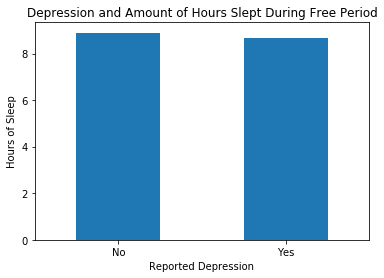

In [21]:
#create bar chart with yes/no freetime dataframe 
sleep_df_yn_f_group.plot.bar(rot=0)
plt.title("Depression and Amount of Hours Slept During Free Period")
plt.ylabel("Hours of Sleep")
plt.xlabel("Reported Depression")
plt.savefig('figures/depression_sleep_freetime_bar.png',dpi=72)
plt.show()



In [22]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_yn_w_group = sleep_df_clean.groupby("Depression").mean()["Time Slept w/ Work"]

In [23]:
sleep_df_yn_w_group

Depression
No     6.864754
Yes    6.582955
Name: Time Slept w/ Work, dtype: float64

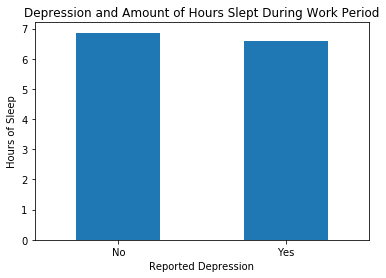

In [24]:
#create bar chart with yes/no dataframe 
sleep_df_yn_w_group.plot.bar(rot=0)
plt.title("Depression and Amount of Hours Slept During Work Period")
plt.ylabel("Hours of Sleep")
plt.xlabel("Reported Depression")
plt.savefig('figures/depression_sleep_work_bar.png',dpi=72)
plt.show()

In [25]:
#Create a new dataframe for the Yes/No values and Group the values by their values. Giving the average time slept for all yes and no
sleep_df_yn_f_group = sleep_df.groupby("Depression").mean()['Time Slept w/ Free Time']
sleep_df_yn_f_group

Depression
No     8.892815
Yes    8.644545
Name: Time Slept w/ Free Time, dtype: float64

In [26]:
#create new filtered dataframe for Depression with work time 
sleep_df_dep_w_filtered = sleep_df_clean.loc[:,["Depression", "Time Slept w/ Work"]]

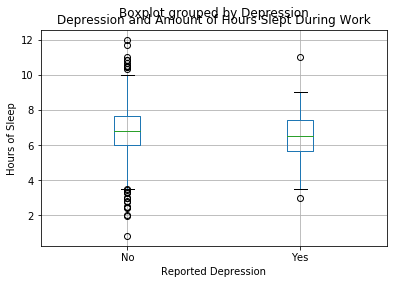

In [27]:
#create new boxplot for Dpression and Time slept with work 
sleep_df_dep_w_filtered.boxplot(column=['Time Slept w/ Work'],by=['Depression']) 
plt.title("Depression and Amount of Hours Slept During Work")
plt.xlabel("Reported Depression")
plt.ylabel("Hours of Sleep")
plt.savefig('figures/depression_sleep_work_box.png',dpi=72)
plt.show()

In [28]:
#create new filtered dataframe for Depression
sleep_df_dep_f_filtered = sleep_df.loc[:,["Depression", "Time Slept w/ Free Time"]]

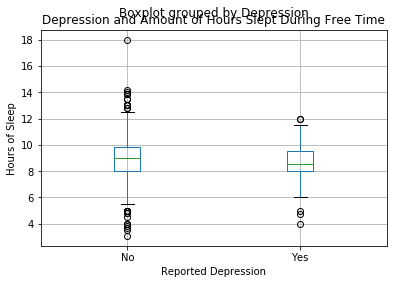

In [29]:
#create new boxplot for Dpression and Time slept with work 
sleep_df_dep_f_filtered.boxplot(column=['Time Slept w/ Free Time'],by=['Depression']) 
plt.title("Depression and Amount of Hours Slept During Free Time")
plt.xlabel("Reported Depression")
plt.ylabel("Hours of Sleep")
plt.savefig('figures/depression_sleep_free_box.png',dpi=72)
plt.show()